# Part 1 - Data Analysis
Downloaded the dataset from **keras.io**, and splitted it into train and test sets. The shape of the datasets are printed out, which provides information about the number of samples and the dimensions of each sample in the dataset.

- **X_train**: the training dataset is a 3D array consisting of 60000 28x28 pixel images.
- **Y_train**: a 1D array containing the class labels for each of the images in the training dataset. Each label is an integer between 0-9, representing a specific article of clothing.
- **X_test**: the test dataset consists of 10000 28x28 pixel images, represented as a 3D array.
- **Y_test**: a 1D array with integers between 0-9 that represent the specific article of clothing for each image in X_test.


In [2]:
!pip install keras

In [3]:
# Import the Fashion MNIST dataset from Keras
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset. This returns two tuples of numpy arrays.
# The first tuple represents the training set and the second tuple the test set.
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()

# Print the shape of the training set images
print('X_train: ' + str(train_X.shape))

# Print the shape of the training set labels
print('Y_train: ' + str(train_y.shape))

# Print the shape of the test set images
print('X_test:  '  + str(test_X.shape))

# Print the shape of the test set labels
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


### Train data analysis

With the use of the Matplotlib Python library, the images of the dataset was plotted. Together with the integer labels, the class names are also shown for an easier overview of the data held in the training dataset.

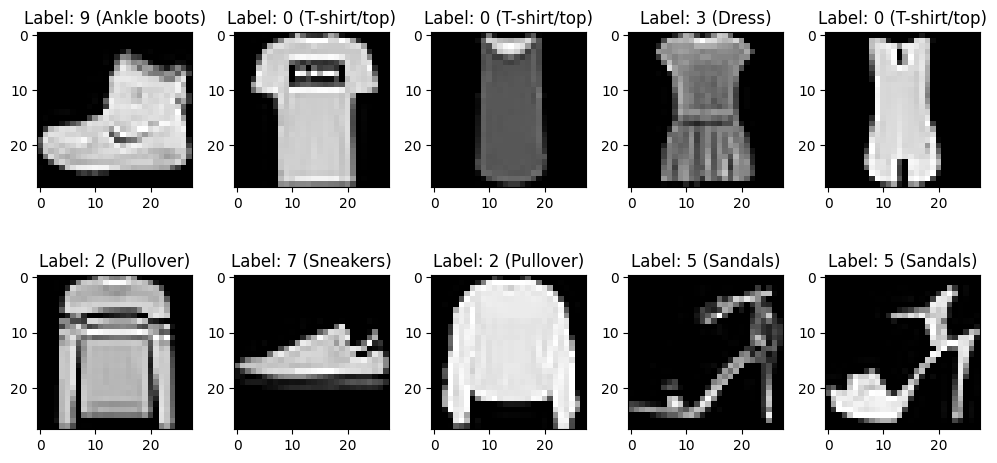

In [4]:
# Import pyplot from matplotlib for plotting
from matplotlib import pyplot

# Define class names for Fashion MNIST
class_names = [
    "T-shirt/top", "Trousers", "Pullover", "Dress", "Coat",
    "Sandals", "Shirt", "Sneakers", "Bag", "Ankle boots"
]

# Define the number of images to display
num = 10

# Select the first 'num' images and labels from the training set
images = train_X[:num]
labels = train_y[:num]

# Define the number of rows and columns for the subplot grid
num_row = 2
num_col = 5

# Create a figure and a grid of subplots
fig, axes = pyplot.subplots(num_row, num_col, figsize=(2*num_col, 2.5*num_row))

# Loop over the range of 'num' and plot each image on the subplot grid
for i in range(num):
    # Determine the current subplot
    ax = axes[i // num_col, i % num_col]

    # Display the image in grayscale
    ax.imshow(images[i], cmap='gray')

    # Set the title of the subplot to the corresponding label and class name
    ax.set_title(f"Label: {labels[i]} ({class_names[labels[i]]})")  # Include text representation

# Adjust the layout so that there is no overlap between subplots
pyplot.tight_layout()

# Display the figure with the subplots
pyplot.show()

To see an example for each label in the training dataset, another plot was also built with Matplotlib.

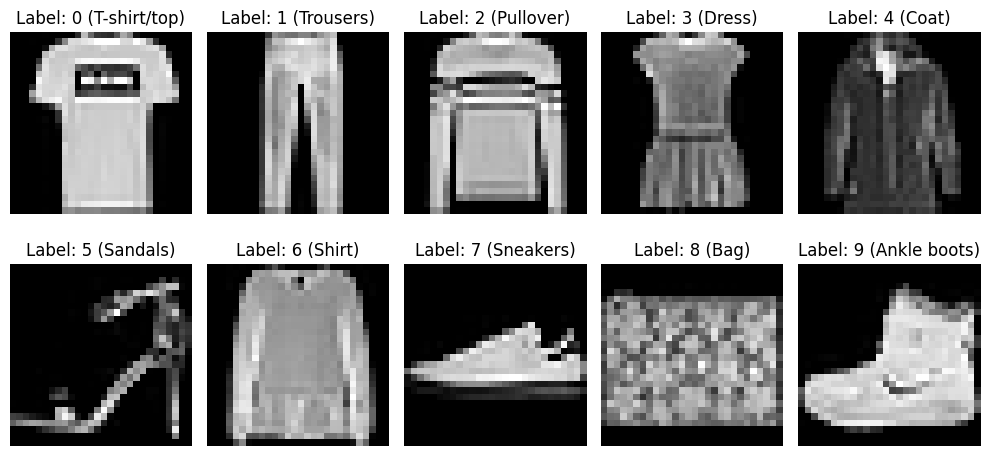

In [5]:
# Create a dictionary to store one image per label
label_to_image = {}

# Iterate through the dataset and select one image for each label
for i in range(len(class_names)):
    # The current label is the index in the class_names list
    label = i

    # Find the index of the first occurrence of the current label in the training labels
    image_index = (train_y == label).nonzero()[0][0]  # Get the first occurrence of the label

    # Add the corresponding image to the dictionary
    label_to_image[label] = train_X[image_index]

# Create a figure and a grid of subplots
fig, axes = pyplot.subplots(num_row, num_col, figsize=(2*num_col, 2.5*num_row))

# Loop over the labels and images in the dictionary
for i, label in enumerate(label_to_image):
    # Determine the current subplot
    ax = axes[i // num_col, i % num_col]

    # Display the image in grayscale
    ax.imshow(label_to_image[label], cmap='gray')

    # Set the title of the subplot to the corresponding label and class name
    ax.set_title(f"Label: {label} ({class_names[label]})")

    # Hide the axes of the subplot
    ax.axis('off')

# Adjust the layout so that there is no overlap between subplots
pyplot.tight_layout()

# Display the figure with the subplots
pyplot.show()

### Feature Analysis
The following graphs are used to visualize the distribution of labels in the Fashion MNIST training and testing datasets. Each subplot is a bar plot where the x-axis represents the clothing categories and the y-axis represents the frequency of each category.

As a result, it can be concluded that the dataset is evenly distributed, there is a same amount of examples for each labels both in the train and test dataset.

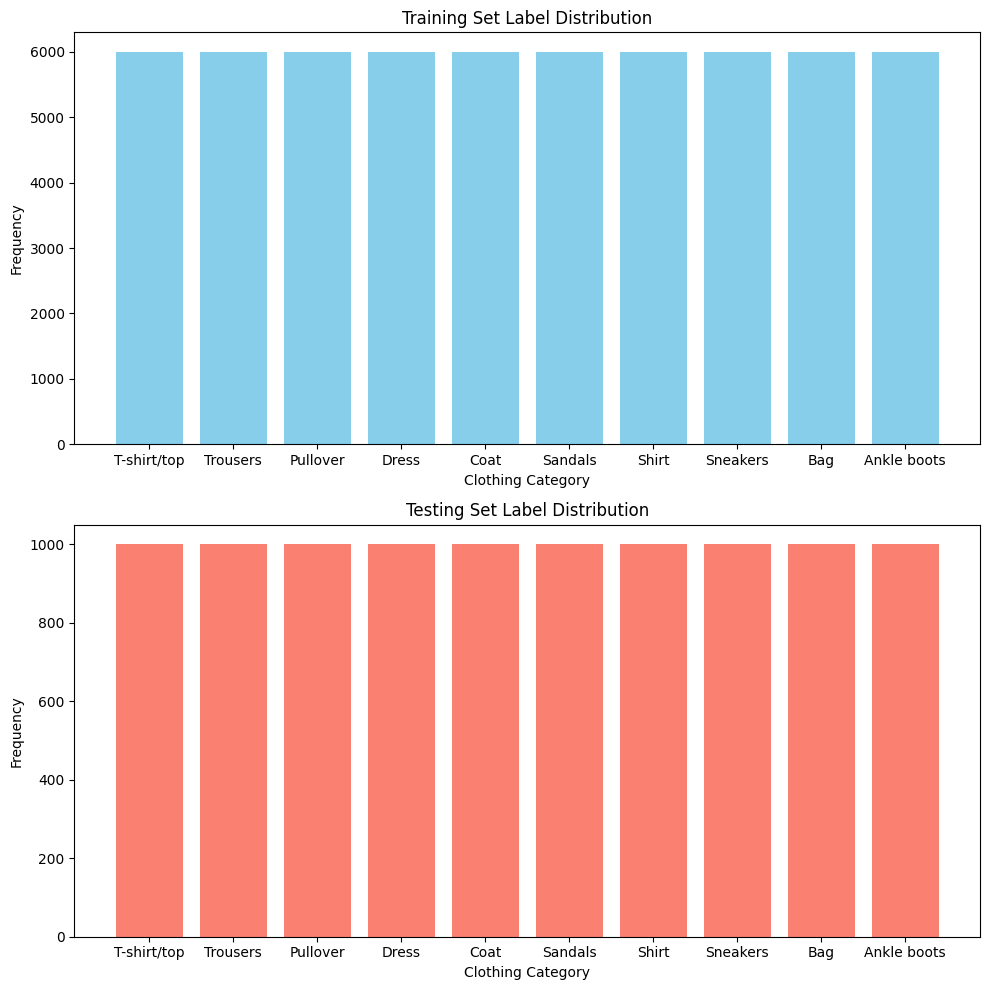

In [6]:
# Import numpy for numerical operations
import numpy as np

# Count the occurrences of each label in the training set
# np.bincount returns the count of each value in an array of non-negative integers
train_label_counts = np.bincount(train_y)

# Count the occurrences of each label in the testing set
test_label_counts = np.bincount(test_y)

# Create a new figure with specified size
pyplot.figure(figsize=(10, 10))

# Create a subplot for the training set
pyplot.subplot(2, 1, 1)  # This creates a grid of 2 rows and 1 column and selects the first plot for drawing

# Create a bar plot for the training set
# range(len(class_names)) gives the x coordinates, train_label_counts gives the heights of the bars
pyplot.bar(range(len(class_names)), train_label_counts, tick_label=class_names, color='skyblue')

# Set the title, x-label, and y-label for the plot
pyplot.title("Training Set Label Distribution")
pyplot.xlabel("Clothing Category")
pyplot.ylabel("Frequency")

# Create a subplot for the testing set
# This selects the second plot in the grid for drawing
pyplot.subplot(2, 1, 2)

# Create a bar plot for the testing set
# Same as above but for the test set
pyplot.bar(range(len(class_names)), test_label_counts, tick_label=class_names, color='salmon')

# Set the title, x-label, and y-label for the plot
pyplot.title("Testing Set Label Distribution")
pyplot.xlabel("Clothing Category")
pyplot.ylabel("Frequency")

# Adjust the layout so that there is no overlap between subplots
pyplot.tight_layout()

# Display the figure with the subplots
pyplot.show()

The next step is to show the complex data in a more interpretable and informative way. The first step is to reduce dimensionality of the images while preserving essential information with the use of PCA and t-SNE.

**PCA** (Principal Component Analysis):
- identifies the most important axes along which the data varies the most
- computes the eigenvectors of the covariance matrix of the data, which represent the directions of maximum variance

**t-SNE** (t-Distributed Stochastic Neighbor Embedding):
- constructs a probability distribution over pairs of high-dimensional data points
- constructs a similar probability distribution over pairs of points in the low-dimensional space
- minimizes the divergence between these two distributions


By visualizing the reduced dimensionality data, it can be observed whether the different clothing categories form distinct clusters and whether there are overlapping classes.

In [7]:
# Import PCA and t-SNE from sklearn for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Flatten the images (convert 28x28 to 784-dimensional vectors)
# This is done because PCA and t-SNE expect 1D inputs
train_X_flat = train_X.reshape(train_X.shape[0], -1)

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
train_X_pca = pca.fit_transform(train_X_flat)

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
train_X_tsne = tsne.fit_transform(train_X_flat)

# Print the transformed data and its shape
print(train_X_tsne)
print(train_X_tsne.shape)

[[-5.1714473   9.322985  ]
 [ 9.466693   -7.4086995 ]
 [-0.26363614 -2.998181  ]
 ...
 [ 3.1294835  -5.1389327 ]
 [ 1.3545067  -1.1965572 ]
 [-4.772961   -0.7761626 ]]
(60000, 2)


/tmp/ipykernel_5763/1610582688.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  pyplot.scatter(train_X_pca[train_y == i, 0], train_X_pca[train_y == i, 1], label=class_names[i], alpha=0.7, s=10, cmap='tab10')
/tmp/ipykernel_5763/1610582688.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  pyplot.scatter(train_X_tsne[train_y == i, 0], train_X_tsne[train_y == i, 1], label=class_names[i], alpha=0.9, s=10, cmap='tab10')


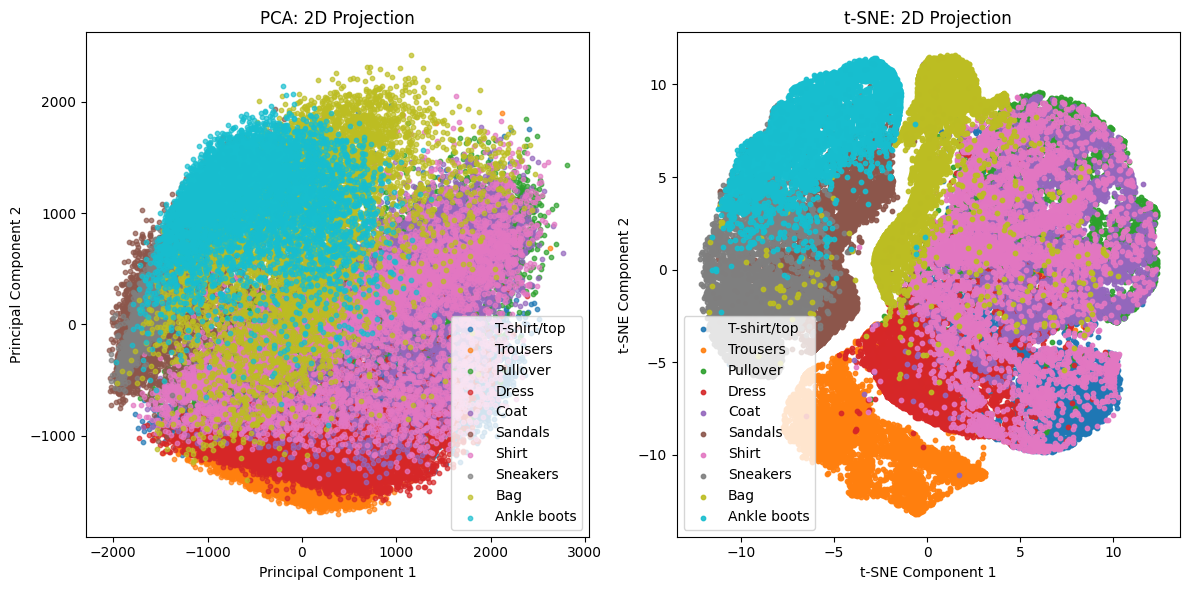

In [8]:
# Create a new figure with specified size
pyplot.figure(figsize=(12, 6))

# Create a subplot for the PCA-reduced data
pyplot.subplot(1, 2, 1)

# Loop over the class names and plot the PCA-reduced data
for i in range(len(class_names)):
    # Plot the data points corresponding to the current class
    pyplot.scatter(train_X_pca[train_y == i, 0], train_X_pca[train_y == i, 1], label=class_names[i], alpha=0.7, s=10, cmap='tab10')

# Set the title, x-label, and y-label for the plot
pyplot.title("PCA: 2D Projection")
pyplot.xlabel("Principal Component 1")
pyplot.ylabel("Principal Component 2")

# Add a legend to the plot
pyplot.legend()

# Create a subplot for the t-SNE-reduced data
pyplot.subplot(1, 2, 2)

# Loop over the class names and plot the t-SNE-reduced data
for i in range(len(class_names)):
    # Plot the data points corresponding to the current class
    pyplot.scatter(train_X_tsne[train_y == i, 0], train_X_tsne[train_y == i, 1], label=class_names[i], alpha=0.9, s=10, cmap='tab10')

# Set the title, x-label, and y-label for the plot
pyplot.title("t-SNE: 2D Projection")
pyplot.xlabel("t-SNE Component 1")
pyplot.ylabel("t-SNE Component 2")

# Add a legend to the plot
pyplot.legend()

# Adjust the layout so that there is no overlap between subplots
pyplot.tight_layout()

# Display the figure with the subplots
pyplot.show()